## Setting Up:

In [2]:
import pandas as pd
import os
import warnings
from tqdm.notebook import tqdm
import zipfile
import cdsapi
import numpy as np
import glob
import xarray as xr

from scripts.config_NOR import *

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download monthly ERA5-Land variables:

To download ERA5-Land data you need to configure your API client first. For this, follow these instructions: https://forum.ecmwf.int/t/step-by-step-instructions-on-how-to-download-data-using-new-climate-data-store-beta-cds-beta/3743. 

To summarize instructions: 
- Your existing CDS credentials will not work in CDS-Beta, you need to have an ECMWF account - register one here: https://www.ecmwf.int/. 
- Once you have set up an account, make sure that you accepted licences in the Download form of the product page: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=download. 
- Make sure that you are logged in ECMWF then navigate to the CDSAPI setup page to copy the content for your .cdsapirc file: https://cds.climate.copernicus.eu/how-to-api. 

Once this is set up, you should be able to download the ERA5-Land data using our script. 

In [6]:
RUN = True
if RUN:
    os.makedirs(path_ERA5_raw, exist_ok=True)
    c = cdsapi.Client()

    # climate variables
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            'product_type': ['monthly_averaged_reanalysis'],
            'variable': [
                '10m_u_component_of_wind',
                '10m_v_component_of_wind',
                '2m_temperature',
                'forecast_albedo',
                'snow_cover',
                'snow_density',
                'snow_depth_water_equivalent',
                'snowfall',
                'snowmelt',
                'surface_latent_heat_flux',
                'surface_net_thermal_radiation',
                'surface_sensible_heat_flux',
                'surface_solar_radiation_downwards',
                'total_precipitation',
            ],
            'year': [
                '1950',
                '1951',
                '1952',
                '1953',
                '1954',
                '1955',
                '1956',
                '1957',
                '1958',
                '1959',
                '1960',
                '1961',
                '1962',
                '1963',
                '1964',
                '1965',
                '1966',
                '1967',
                '1968',
                '1969',
                '1970',
                '1971',
                '1972',
                '1973',
                '1974',
                '1975',
                '1976',
                '1977',
                '1978',
                '1979',
                '1980',
                '1981',
                '1982',
                '1983',
                '1984',
                '1985',
                '1986',
                '1987',
                '1988',
                '1989',
                '1990',
                '1991',
                '1992',
                '1993',
                '1994',
                '1995',
                '1996',
                '1997',
                '1998',
                '1999',
                '2000',
                '2001',
                '2002',
                '2003',
                '2004',
                '2005',
                '2006',
                '2007',
                '2008',
                '2009',
                '2010',
                '2011',
                '2012',
                '2013',
                '2014',
                '2015',
                '2016',
                '2017',
                '2018',
                '2019',
                '2020',
                '2021',
                '2022',
                '2023',
                '2024',
            ],
            'month': [
                '01',
                '02',
                '03',
                '04',
                '05',
                '06',
                '07',
                '08',
                '09',
                '10',
                '11',
                '12',
            ],
            'time': ['00:00'],
            "data_format":
            "netcdf",
            "download_format":
            "zip",
            'area': [
                72,    # North latitude
                0,     # West longitude
                42,    # South latitude
                32,    # East longitude
            ]
        }, path_ERA5_raw + 'download.netcdf.zip')
    with zipfile.ZipFile(path_ERA5_raw + 'download.netcdf.zip', 'r') as zip:
        zip.extractall(path_ERA5_raw)

    # geopotential pressure (old too low resolution)
    # c.retrieve(
    #     "reanalysis-era5-single-levels", {
    #         "product_type": ["reanalysis"],
    #         "variable": ["geopotential"],
    #         "year": ["2024"],
    #         "month": ["06"],
    #         "day": ["01"],
    #         "time": ["12:00"],
    #         "data_format": "netcdf",
    #         'area': [
    #             50,
    #             0,
    #             45,
    #             20,
    #         ]
    #     }, path_ERA5_raw + 'era5_geopotential_pressure.nc')
    
    # geopot from era5-land reanalysis directly (new product with better resolution)
    # download it separately so that the pipeline still works
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            "variable": ["geopotential"],
            "data_format": "netcdf",
            "download_format": "zip",
            'area': [
                72,    # North latitude
                0,     # West longitude
                42,    # South latitude
                32,    # East longitude
            ]
        }, path_ERA5_raw + 'download_geopot.netcdf.zip')
    with zipfile.ZipFile(path_ERA5_raw + 'download_geopot.netcdf.zip', 'r') as zip:
        zip.extractall(path_ERA5_raw)

"""
NORWAY
'area': [
                72,    # North latitude
                4,     # West longitude
                57,    # South latitude
                32,    # East longitude
            ]
"""

2025-05-13 20:21:23,476 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-13 20:21:23,477 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-13 20:21:25,216 INFO Request ID is 0271ebf0-82fe-412e-81fd-56a67f0c51fb
2025-05-13 20:21:25,334 INFO status has been updated to accepted
2025-05-13 20:21:33,997 INFO status has been updated to running
2025-05-13 21:01:51,904 INFO status has been updated to successful


9b307be7ef169cf8d0909211a6269515.zip:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

2025-05-13 21:03:13,078 INFO Request ID is 61318039-4d8d-4ac0-a595-efaf8d9cd274
2025-05-13 21:03:13,149 INFO status has been updated to accepted
2025-05-13 21:03:21,757 INFO status has been updated to running
2025-05-13 21:03:26,879 INFO status has been updated to successful


dbd65b833e42442da755429c56166e8b.zip:   0%|          | 0.00/767k [00:00<?, ?B/s]

"\nNORWAY\n'area': [\n                72,    # North latitude\n                4,     # West longitude\n                57,    # South latitude\n                32,    # East longitude\n            ]\n"

In [7]:
! ls "{path_ERA5_raw}"

data_stream-moda.nc  geo.area-subset.72.32.42.0.nc


In [10]:
# Correct era5 data
dc = xr.open_dataset(path_ERA5_raw + 'data_stream-moda.nc')
dc2 = dc.rename(
    {'valid_time': 'time'}
)  # Coordinates have changed recently in the API, this is to keep compatibility with our code

# delete file if already exists
if os.path.exists(path_ERA5_raw + 'era5_monthly_averaged_data.nc'):
    os.remove(path_ERA5_raw + 'era5_monthly_averaged_data.nc')
dc2.to_netcdf(path_ERA5_raw + "era5_monthly_averaged_data.nc")

# change name of geopotential file: 
dc = xr.open_dataset(path_ERA5_raw + 'geo.area-subset.72.32.42.0.nc')
# delete file if already exists
if os.path.exists(path_ERA5_raw + 'era5_geopotential_pressure.nc'):
    os.remove(path_ERA5_raw + 'era5_geopotential_pressure.nc')
dc.to_netcdf(path_ERA5_raw + "era5_geopotential_pressure.nc")

# delete old files
os.remove(path_ERA5_raw + 'download.netcdf.zip')
os.remove(path_ERA5_raw + 'data_stream-moda.nc')
os.remove(path_ERA5_raw+'download_geopot.netcdf.zip')
os.remove(path_ERA5_raw+'geo.area-subset.72.32.42.0.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mburlet/scratch/data/DATA_MB/WGMS/Norway/ERA5Land/raw/test/download.netcdf.zip'

In [11]:
! ls "{path_ERA5_raw}"

data_stream-moda.nc	       era5_monthly_averaged_data.nc
era5_geopotential_pressure.nc  geo.area-subset.72.32.42.0.nc


### Check geopotential data:

In [7]:
geopot_era5 = xr.open_dataset(path_ERA5_raw + 'era5_geopotential_pressure.nc')
display(geopot_era5)

display(xr.open_dataset(path_ERA5_raw + 'era5_monthly_averaged_data.nc'))

<xarray.Dataset> Size: 341kB
Dimensions:    (time: 1, latitude: 151, longitude: 281)
Coordinates:
  * longitude  (longitude) float32 1kB 4.0 4.1 4.2 4.3 ... 31.7 31.8 31.9 32.0
  * latitude   (latitude) float32 604B 72.0 71.9 71.8 71.7 ... 57.2 57.1 57.0
  * time       (time) datetime64[ns] 8B 2013-08-09T12:00:00
Data variables:
    z          (time, latitude, longitude) float64 339kB ...
Attributes:
    Conventions:               CF-1.6
    history:                   Fri Jun 12 14:41:56 2020: ncpdq -U geo_1279l4_...
    NCO:                       4.7.2
    nco_openmp_thread_number:  1

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 900, latitude: 151, longitude: 281)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-12-01
  * latitude   (latitude) float64 1kB 72.0 71.9 71.8 71.7 ... 57.2 57.1 57.0
  * longitude  (longitude) float64 2kB 4.0 4.1 4.2 4.3 ... 31.7 31.8 31.9 32.0
    expver     (time) <U4 14kB ...
Data variables: (12/14)
    u10        (time, latitude, longitude) float32 153MB ...
    v10        (time, latitude, longitude) float32 153MB ...
    t2m        (time, latitude, longitude) float32 153MB ...
    fal        (time, latitude, longitude) float32 153MB ...
    snowc      (time, latitude, longitude) float32 153MB ...
    rsn        (time, latitude, longitude) float32 153MB ...
    ...         ...
    smlt       (time, latitude, longitude) float32 153MB ...
    slhf       (time, latitude, longitude) float32 153MB ...
    str        (time, latitude, longitude) float32 153MB ...
    sshf       (time, latitude, longitude) float32 153MB ...
    ssrd       (time, latitude, longitude) float32 153MB ...
    tp         (time, latitude, longitude) float32 153MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-12T14:32 GRIB to CDM+CF via cfgrib-0.9.1...

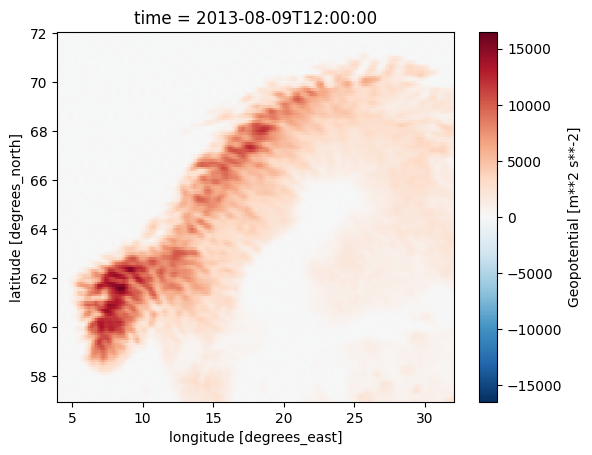

In [8]:
# plot geopot new
geopot_era5.z.plot()

In [9]:
# Get central latitude (mean of latitude values)
latitude_center = geopot_era5.latitude.values.mean()

# Earth's approximate conversion factor (meters per degree)
meters_per_degree_latitude = 111320  # Roughly constant for latitude
meters_per_degree_longitude = 111320 * np.cos(
    np.radians(latitude_center))  # Adjust for longitudegitude

# Compute resolution
dx_m = np.round(
    abs(geopot_era5.longitude[1] - geopot_era5.longitude[0]).values * meters_per_degree_longitude, 3)
dy_m = np.round(
    abs(geopot_era5.latitude[1] - geopot_era5.latitude[0]).values * meters_per_degree_latitude, 3)
print(f"Cell size of grid: {dx_m:.2f} x {dy_m:.2f} meters")

Cell size of grid: 4792.45 x 11131.83 meters
